Precisión del modelo: 0.94
Matriz de Confusión:
[[59379     0]
 [ 3981     0]]
Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     59379
           1       0.00      0.00      0.00      3981

    accuracy                           0.94     63360
   macro avg       0.47      0.50      0.48     63360
weighted avg       0.88      0.94      0.91     63360



/Users/wuons/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/wuons/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/wuons/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


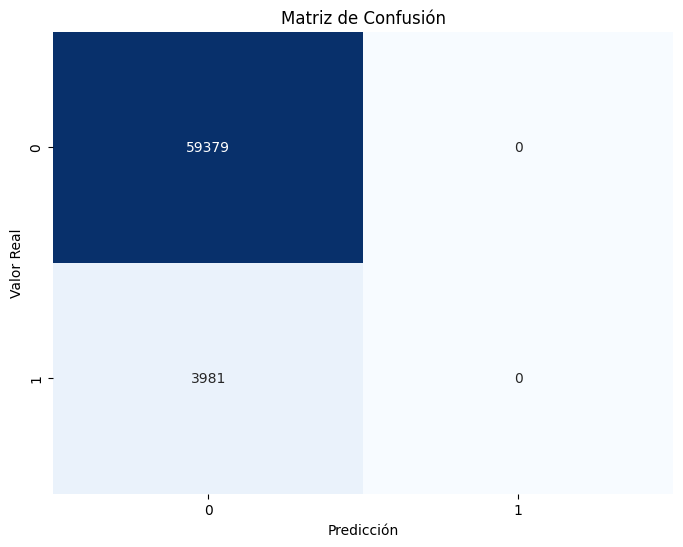

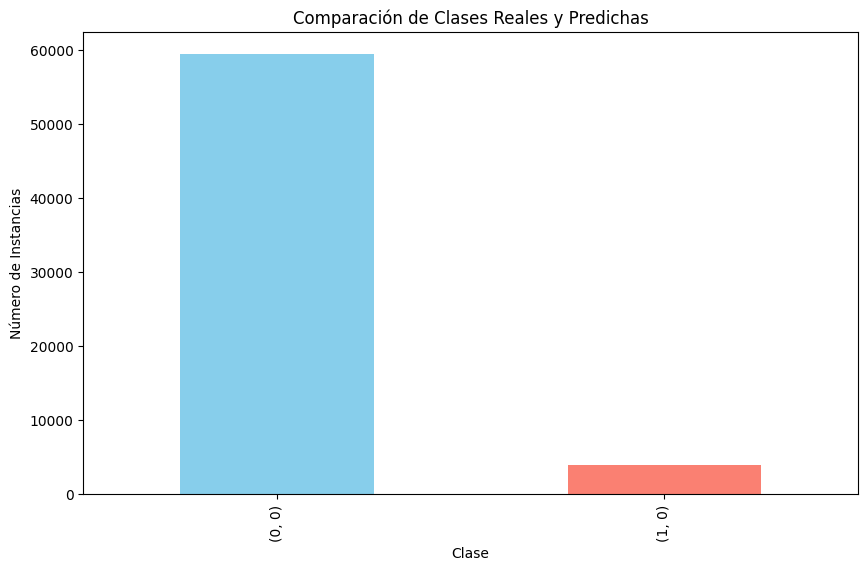

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Leer el dataset desde el archivo CSV
df = pd.read_csv('Cleaned-Data.csv')

# Seleccionar las columnas a utilizar
features = df[['Contact_Yes', 'Contact_No', 'Contact_Dont-Know']]
target = df['None_Sympton']  # Seleccionar la columna a predecir

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Normalizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear el clasificador KNN
knn = KNeighborsClassifier(n_neighbors=3)  # Numero de vecinos

# Entrenar el clasificador
knn.fit(X_train_scaled, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = knn.predict(X_test_scaled)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Imprimir resultados
print(f'Precisión del modelo: {accuracy:.2f}')
print('Matriz de Confusión:')
print(conf_matrix)
print('Informe de Clasificación:')
print(class_report)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()

# Visualizar un gráfico de barras para comparar las clases reales y predichas
plt.figure(figsize=(10, 6))
df_compare = pd.DataFrame({'Real': y_test, 'Predicho': y_pred})
df_compare.value_counts().sort_index().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Comparación de Clases Reales y Predichas')
plt.xlabel('Clase')
plt.ylabel('Número de Instancias')
plt.show()
